In [1]:
import os
import pyslha
slhaFolder = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Obs'
resultsFolder = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/results/Simp_output_Obs'

my1_values = []
gqv_values = []
theory_values = []
exp_limit_values = []
r_values = []
r_expected_values = []

for i in range(1, 32): # desde 01 hasta 31
    # Formato de los archivos para coincidir con 'run_01_tag_1.slha' y similares
    run_num = str(i).zfill(2)
    
    slhaFile = os.path.join(slhaFolder, f"run_{run_num}_tag_1.slha")
    smodelsFile = os.path.join(resultsFolder, f"run_{run_num}_tag_1.slha.smodels")
    
    if os.path.exists(slhaFile):
        slhaData = pyslha.read(slhaFile)
        my1_value = slhaData.blocks['MASS'][5000001]
        gvq = slhaData.blocks['DMINPUTS'][4]
        
        my1_values.append(my1_value)
        gqv_values.append(gvq)
        
    if os.path.exists(smodelsFile):
        with open(smodelsFile, 'r') as file:
            for line in file:
                if 'CMS-EXO-19-012' in line:
                    data = line.split()
                    theory_values.append(float(data[3]))
                    exp_limit_values.append(float(data[4]))
                    r_values.append(float(data[5]))
                    r_expected_values.append(float(data[6]))
                    break

print("my1:", my1_values)
print("gqv:", gqv_values)
print("Theory_Value(fb):", theory_values)
print("Exp_limit(fb):", exp_limit_values)
print("r:", r_values)
print("r_expected:", r_expected_values)



my1: [1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0]
gqv: [0.17744, 0.20426, 0.20895, 0.20524, 0.1659, 0.13295, 0.14614, 0.1927, 0.22156, 0.24627, 0.26604, 0.28235, 0.30522, 0.30275, 0.28507, 0.26851, 0.28902, 0.3144, 0.35165, 0.404, 0.42748, 0.4478, 0.46606, 0.4861, 0.4515, 0.45562, 0.50188, 0.58749, 0.6339, 0.90973, 0.94069]
Theory_Value(fb): [18.39, 48.48, 44.29, 32.73, 10.07, 2.72, 3.421, 9.786, 14.1, 17.23, 18.58, 18.7, 20.09, 15.86, 10.39, 6.78, 7.312, 8.132, 9.951, 13.08, 13.08, 12.72, 12.21, 11.83, 7.894, 6.926, 8.17, 11.79, 13.07, 33.76, 33.03]
Exp_limit(fb): [76.26, 169.6, 151.0, 113.8, 45.6, 16.9, 18.48, 36.64, 45.08, 49.52, 49.75, 47.6, 48.11, 38.21, 26.24, 18.01, 18.26, 19.05, 21.63, 26.31, 25.59, 24.37, 23.0, 21.92, 15.07, 13.17, 14.96, 20.53, 22.31, 54.04, 52.66]
r: [0.2412

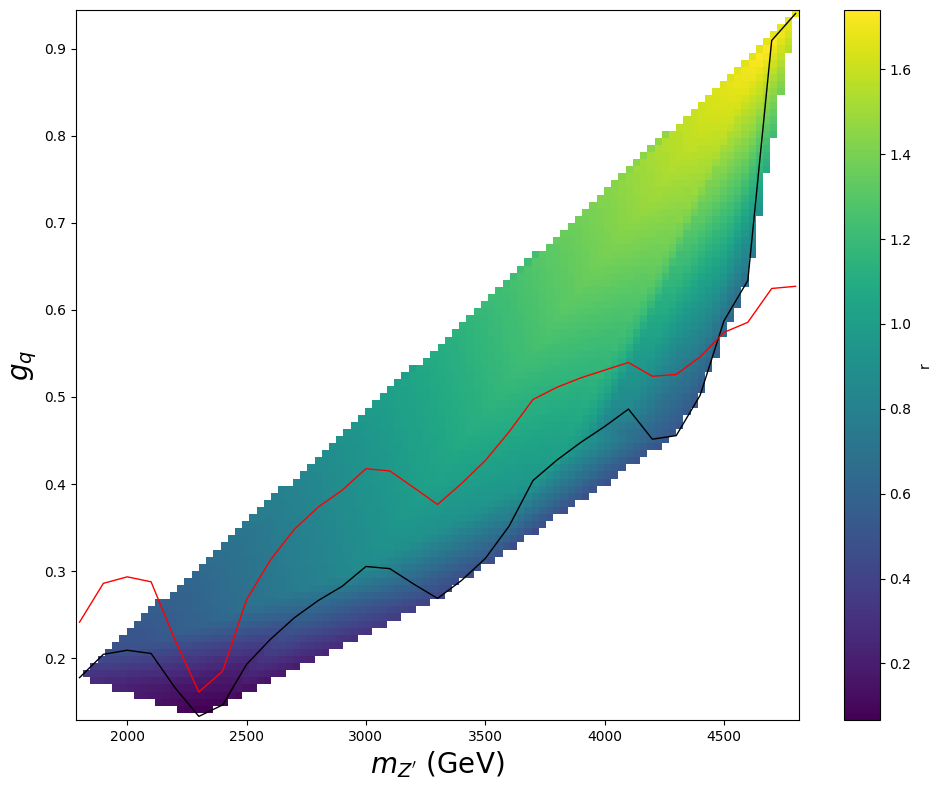

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

my1 = [1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0]
gqv = [0.17744, 0.20426, 0.20895, 0.20524, 0.1659, 0.13295, 0.14614, 0.1927, 0.22156, 0.24627, 0.26604, 0.28235, 0.30522, 0.30275, 0.28507, 0.26851, 0.28902, 0.3144, 0.35165, 0.404, 0.42748, 0.4478, 0.46606, 0.4861, 0.4515, 0.45562, 0.50188, 0.58749, 0.6339, 0.90973, 0.94069]
r = [0.2412, 0.2859, 0.2934, 0.2875, 0.2209, 0.1609, 0.1851, 0.2671, 0.3127, 0.3479, 0.3735, 0.3929, 0.4176, 0.4151, 0.396, 0.3765, 0.4004, 0.4268, 0.46, 0.4974, 0.5112, 0.522, 0.5309, 0.5398, 0.5239, 0.5259, 0.5462, 0.5742, 0.5857, 0.6247, 0.6273]
r_expected =  [0.3072, 0.4664, 0.4765, 0.4282, 0.1625, 0.05179, 0.07167, 0.2289, 0.3896, 0.544, 0.669, 0.7581, 0.8786, 0.7872, 0.5849, 0.4194, 0.4589, 0.5301, 0.6894, 0.9566, 1.004, 0.9671, 0.8067, 0.8509, 0.5752, 0.4942, 0.5251, 0.6803, 0.6598, 1.755, 1.682]
Theory_Value =  [18.39, 48.48, 44.29, 32.73, 10.07, 2.72, 3.421, 9.786, 14.1, 17.23, 18.58, 18.7, 20.09, 15.86, 10.39, 6.78, 7.312, 8.132, 9.951, 13.08, 13.08, 12.72, 12.21, 11.83, 7.894, 6.926, 8.17, 11.79, 13.07, 33.76, 33.03]
Exp_limit = [76.26, 169.6, 151.0, 113.8, 45.6, 16.9, 18.48, 36.64, 45.08, 49.52, 49.75, 47.6, 48.11, 38.21, 26.24, 18.01, 18.26, 19.05, 21.63, 26.31, 25.59, 24.37, 23.0, 21.92, 15.07, 13.17, 14.96, 20.53, 22.31, 54.04, 52.66]
r_line = [tv/el for tv, el in zip(Theory_Value, Exp_limit)]


x = np.linspace(min(my1), max(my1), 100)
y = np.linspace(min(gqv), max(gqv), 100)
grid_x, grid_y = np.meshgrid(x, y)
grid_rexpected = griddata((my1, gqv), r_expected, (grid_x, grid_y), method='linear')

plt.figure(figsize=(10, 8))
plt.pcolormesh(grid_x, grid_y, grid_rexpected, shading='auto', cmap='viridis')
plt.plot(my1, gqv, 'k-', linewidth=1)
plt.plot(my1, r_line, 'r-', linewidth=1)

plt.colorbar(label='r')
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',fontsize=20)    
plt.ylabel(r'$g_{q}$',fontsize=20)
plt.tight_layout()
plt.show()



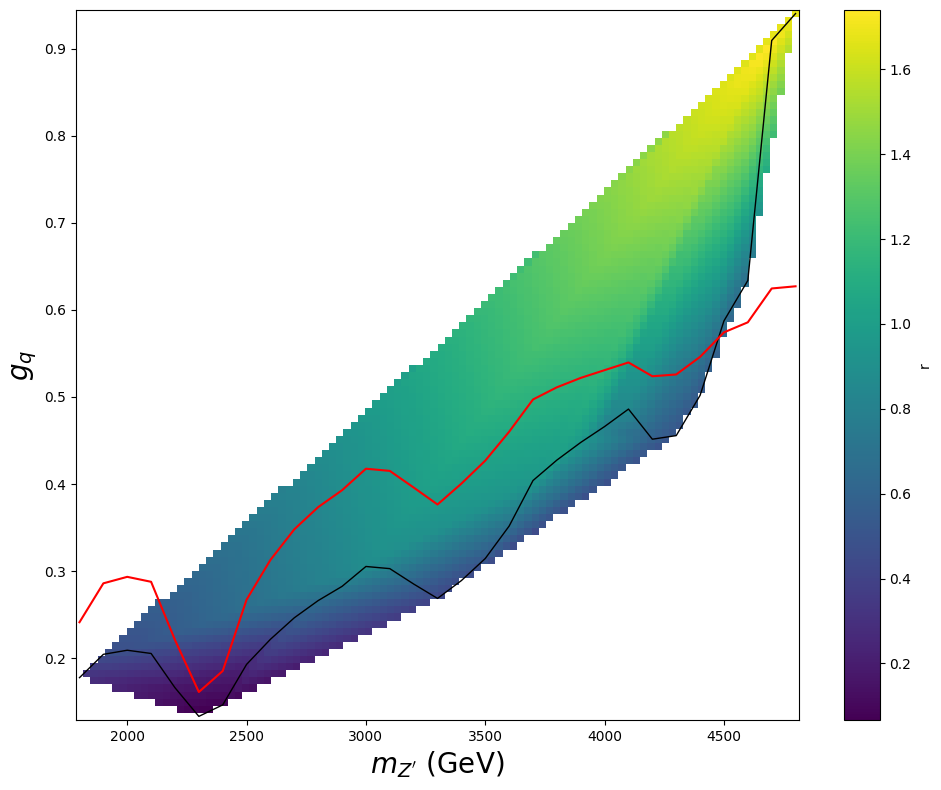

In [3]:
grid_r = griddata((my1, gqv), r_expected, (grid_x, grid_y), method='linear')
plt.figure(figsize=(10, 8))
plt.pcolormesh(grid_x, grid_y, grid_r, shading='auto', cmap='viridis')
plt.plot(my1, gqv, 'k-', linewidth=1)
plt.plot(my1, r_line, 'r-', label=r"$r_{line}$")

plt.colorbar(label='r')
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',fontsize=20)    
plt.ylabel(r'$g_{q}$',fontsize=20)
plt.tight_layout()
plt.show()

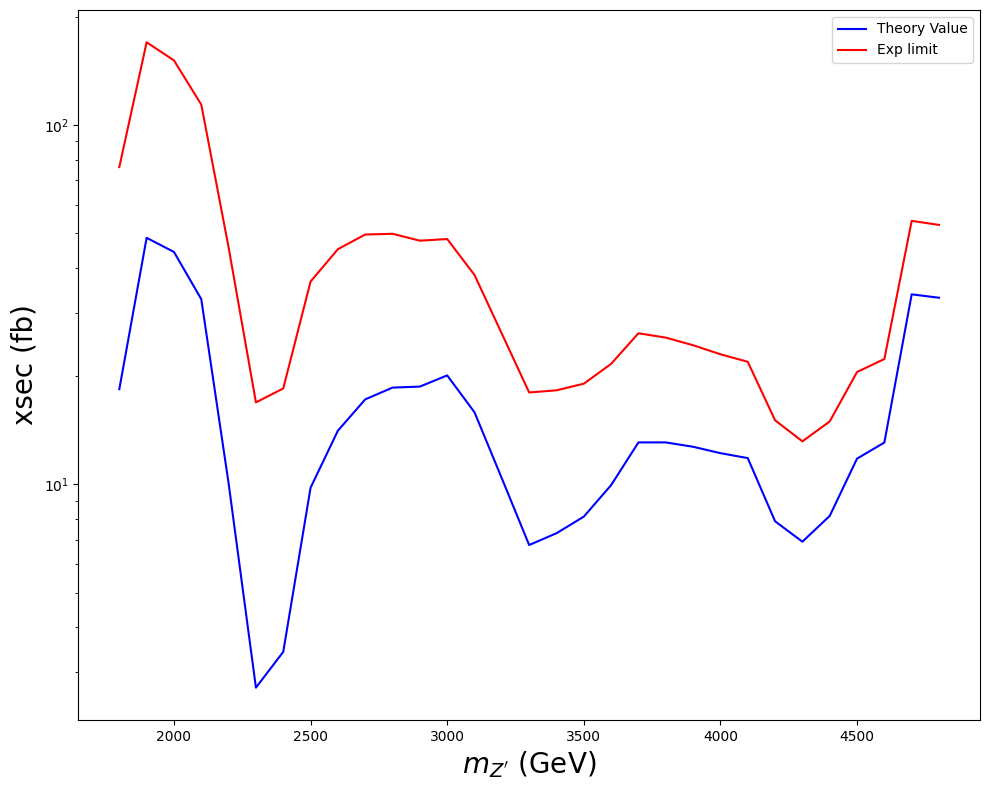

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(my1, Theory_Value, 'b-', label="Theory Value")
plt.plot(my1, Exp_limit, 'r-', label="Exp limit")
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)', fontsize=20)    
plt.ylabel('xsec (fb)', fontsize=20)
plt.yscale('log')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
